In [1]:
"""
    Author : Tyronne Wickramarathne
    Date   : 27-10-2021
    Description : This application illustrates the driver demographic in a line chart. This is a Demo application to test IntelliJ's Dataspell IDE.
                  The dataset has been obtained from the official QLD Government website.
    E mail :
"""
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("~/nfs/data-science/data/b_driverdemographics.csv",low_memory=False)
data.head().transpose()

,0,1,2,3,4
Crash_Year,2001,2001,2001,2001,2001
Crash_Police_Region,Brisbane,Brisbane,Brisbane,Brisbane,Brisbane
Crash_Severity,Fatal,Fatal,Fatal,Fatal,Fatal
Involving_Male_Driver,No,No,No,No,No
Involving_Female_Driver,No,Yes,Yes,Yes,Yes
Involving_Young_Driver_16-24,No,No,No,No,No
Involving_Senior_Driver_60plus,No,No,Yes,Yes,Yes
Involving_Provisional_Driver,No,No,No,No,Yes
Involving_Overseas_Licensed_Driver,No,No,No,No,No
Involving_Unlicensed_Driver,No,No,No,Yes,No


In [3]:
print('The data set contains crashes between',data['Crash_Year'].min(), 'and ',data['Crash_Year'].max(), 'years of crash data')


The data set contains crashes between 2001 and  2020 years of crash data


In [4]:
data.shape

(15322, 16)

In [5]:
bars = data[['Crash_Year','Involving_Young_Driver_16-24','Involving_Senior_Driver_60plus','Involving_Provisional_Driver','Involving_Unlicensed_Driver','Involving_Overseas_Licensed_Driver']]
bars["Involving_Young_Driver_16-24"].replace({"No": 0, "Yes": 1}, inplace=True)
bars["Involving_Senior_Driver_60plus"].replace({"No": 0, "Yes": 1}, inplace=True)
bars["Involving_Provisional_Driver"].replace({"No": 0, "Yes": 1}, inplace=True)
bars["Involving_Unlicensed_Driver"].replace({"No": 0, "Yes": 1}, inplace=True)
bars["Involving_Overseas_Licensed_Driver"].replace({"No": 0, "Yes": 1}, inplace=True)
bars = bars.rename(columns={'Involving_Young_Driver_16-24': 'Young Drivers: 16-24','Involving_Senior_Driver_60plus':'Senior Drivers: 60+','Involving_Provisional_Driver':'Provisional Drivers','Involving_Unlicensed_Driver':'Unlicensed Drivers','Involving_Overseas_Licensed_Driver':'Overseas Licensed Drivers'})

bars_new = bars.groupby(['Crash_Year']).sum().reindex()
bars_new.head()

,Young Drivers: 16-24,Senior Drivers: 60+,Provisional Drivers,Unlicensed Drivers,Overseas Licensed Drivers
Crash_Year,,,,,
2001,505,319,309,247,195
2002,507,324,306,248,186
2003,504,328,303,238,195
2004,518,334,316,263,201
2005,501,344,308,255,218


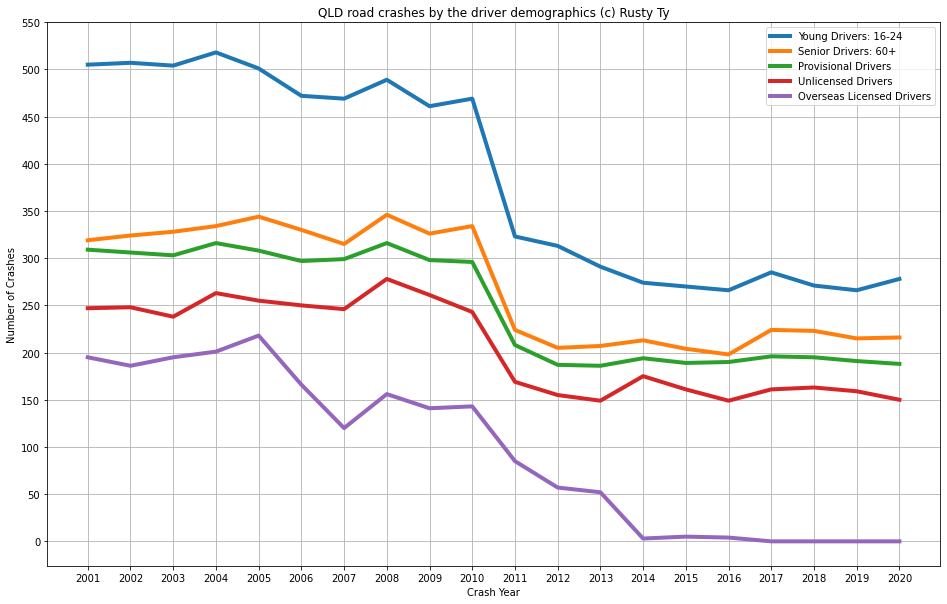

In [6]:
yticks = np.arange(0, 600, 50)
xticks = np.arange(2001, 2021, 1)
# from collections import OrderedDict
# cmaps = OrderedDict()
# cmaps['Sequential'] = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds','YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu','GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
# cols = ['red','blue','orange','purple','green','purple']
ignore = bars_new.plot.line(linewidth=4, figsize=(16, 10), ylabel='Number of Crashes',xlabel='Crash Year', title='QLD road crashes by the driver demographics (c) Rusty Ty', xticks=xticks, yticks=yticks, grid=True)
